Задача 1: Завантаження даних про енергію...
           Country Energy Supply Energy Supply per Capita % Renewable
17     Afghanistan           321                       10    78.66928
18         Albania           102                       35         100
19         Algeria          1959                       51     0.55101
20  American Samoa           ...                      ...    0.641026
21         Andorra             9                      121    88.69565

Задача 2: Перетворення 'Energy Supply' у гігаджоулі...
           Country  Energy Supply Energy Supply per Capita % Renewable
17     Afghanistan   3.210000e+08                       10    78.66928
18         Albania   1.020000e+08                       35         100
19         Algeria   1.959000e+09                       51     0.55101
20  American Samoa            NaN                      ...    0.641026
21         Andorra   9.000000e+06                      121    88.69565

Задача 3: Очищення назв країн...
17       Afghanistan

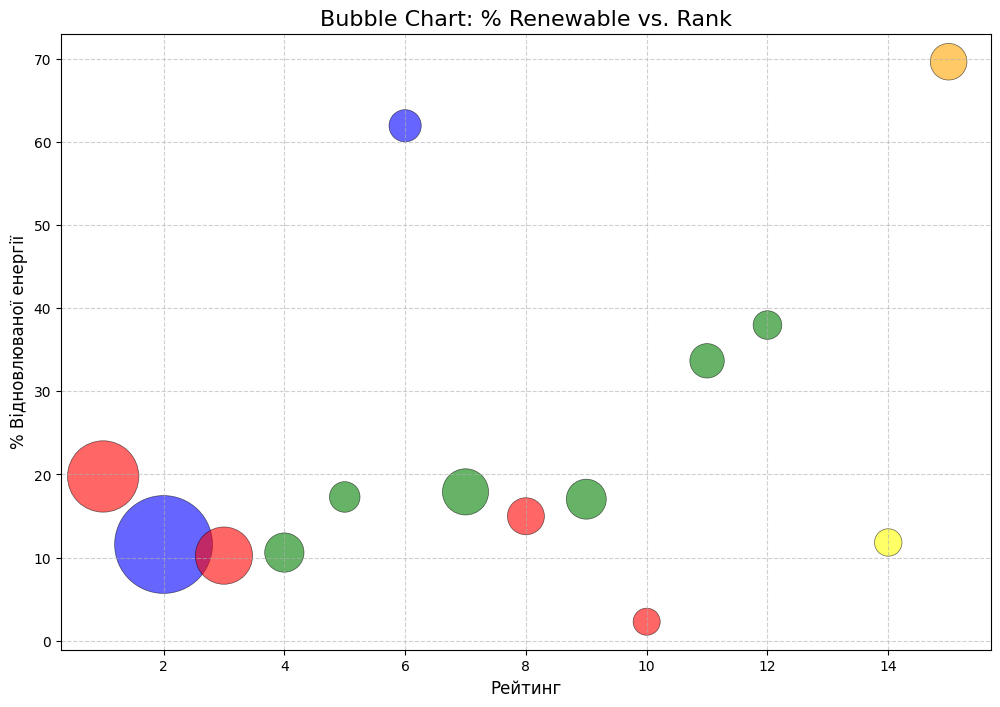

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 1
def load_energy_data():
    print("Задача 1: Завантаження даних про енергію...")
    df = pd.read_excel("En_In.xls")
    df = df.iloc[17:243, 2:] 
    df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    print(df.head())
    return df

# Task 2
def convert_energy_supply(df):
    print("\nЗадача 2: Перетворення 'Energy Supply' у гігаджоулі...")
    df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce') * 1_000_000
    print(df.head())
    return df

# Task 3
def clean_country_names(df):
    print("\nЗадача 3: Очищення назв країн...")
    df['Country'] = df['Country'].str.replace(r'\d+|\(.*?\)', '', regex=True).str.strip()
    print(df['Country'].head())
    return df

# Task 4
def rename_countries(df):
    print("\nЗадача 4: Перейменування конкретних країн...")
    country_renames = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    }
    df['Country'] = df['Country'].replace(country_renames)
    df.set_index('Country', inplace=True)
    print(df.head())
    return df

# Task 5
def load_gdp_data():
    print("\nЗадача 5: Завантаження даних про ВВП...")
    df = pd.read_csv("gpd.csv", skiprows=4)
    country_renames = {
        "Korea, Rep.": "South Korea",
        "Iran, Islamic Rep.": "Iran",
        "Hong Kong SAR, China": "Hong Kong"
    }
    df['Country Name'] = df['Country Name'].replace(country_renames)
    df.rename(columns={'Country Name': 'Country'}, inplace=True)
    df.set_index('Country', inplace=True)
    print(df.head())
    return df

# Task 6
def load_scimago_data():
    print("\nЗадача 6: Завантаження та фільтрація даних Scimago...")
    df = pd.read_excel("scimagojr.xlsx")
    df = df[df['Rank'] <= 15]
    df.set_index('Country', inplace=True)
    print(df.head())
    return df

# Task 7
def merge_datasets(energy_df, gdp_df, scimago_df):
    print("\nЗадача 7: Об’єднання наборів даних...")
    combined_df = pd.merge(scimago_df, energy_df, left_index=True, right_index=True, how='inner')
    combined_df = pd.merge(combined_df, gdp_df, left_index=True, right_index=True, how='inner')
    print(combined_df.head())
    return combined_df

# Task 8
def calculate_average_gdp(df):
    print("\nЗадача 8: Обчислення середнього ВВП...")
    gdp_columns = df.loc[:, '2006':'2015']
    average_gdp = gdp_columns.mean(axis=1).sort_values(ascending=False)
    print(average_gdp)
    return average_gdp

# Task 9
def calculate_gdp_change(df, average_gdp):
    print("\nЗадача 9: Розрахунок зміни ВВП для 5-ї країни...")
    fifth_country = average_gdp.index[4]
    gdp_change = df.loc[fifth_country, '2015'] - df.loc[fifth_country, '2006']
    print(f"{fifth_country}: {gdp_change}")
    return fifth_country, gdp_change

# Task 10
def max_renewable_country(df):
    print("\nЗадача 10: Країна з максимальною % відновлюваної енергії...")
    max_country = df['% Renewable'].idxmax()
    max_value = df.loc[max_country, '% Renewable']
    print(f"{max_country}: {max_value}")
    return max_country, max_value

# Task 11
def calculate_population(df):
    print("\nЗадача 11: Обчислення оцінки чисельності населення...")
    df['Population'] = pd.to_numeric(df['Energy Supply'], errors='coerce') / pd.to_numeric(df['Energy Supply per Capita'], errors='coerce')
    df = df.dropna(subset=['Population'])
    sixth_country = df.nlargest(6, 'Population').iloc[5]
    print(f"{sixth_country.name}: {sixth_country['Population']}")
    return sixth_country.name, sixth_country['Population']

# Task 12
def calculate_correlation(df):
    print("\nЗадача 12: Обчислення кореляції...")
    df['Citations per Capita'] = df['Citable documents'] / df['Population']
    correlation = df['Citations per Capita'].corr(df['Energy Supply per Capita'])
    print(f"Кореляція: {correlation}")
    return correlation

# Task 13
def add_renewable_indicator(df):
    print("\nЗадача 13: Додавання індикатора відновлюваної енергії...")
    median_renewable = df['% Renewable'].median()
    df['Renewable Indicator'] = (df['% Renewable'] >= median_renewable).astype(int)
    print(df['Renewable Indicator'])
    return df

# Task 14
def group_by_continent(df):
    print("\nЗадача 14: Групування країн за континентами...")
    continent_dict = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia',
        'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America',
        'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia',
        'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 'Brazil': 'South America'
    }
    df['Continent'] = df.index.to_series().map(continent_dict)
    grouped = df.groupby('Continent').agg(
        size=('Population', 'count'),
        sum=('Population', 'sum'),
        mean=('Population', 'mean'),
        std=('Population', 'std')
    )
    print(grouped)
    return grouped

# Task 15
def create_bubble_chart(df):
    continent_dict = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia',
        'United Kingdom': 'Europe', 'Russian Federation': 'Europe',
        'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia',
        'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe',
        'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia',
        'Brazil': 'South America'
    }
    continent_colors = {
        'Asia': 'red',
        'North America': 'blue',
        'Europe': 'green',
        'Australia': 'yellow',
        'South America': 'orange'
    }
    df['Continent'] = df.index.map(continent_dict)
    df['Color'] = df['Continent'].map(continent_colors)
    bubble_chart_data = df[['Rank', '% Renewable', '2015', 'Color']].dropna()
    bubble_chart_data['Bubble Size'] = bubble_chart_data['2015'] / 1e12
    plt.figure(figsize=(12, 8))
    plt.scatter(
        bubble_chart_data['Rank'],
        bubble_chart_data['% Renewable'],
        s=bubble_chart_data['Bubble Size'] * 300,
        c=bubble_chart_data['Color'],
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )
    plt.title('Bubble Chart: % Renewable vs. Rank', fontsize=16)
    plt.xlabel('Рейтинг', fontsize=12)
    plt.ylabel('% Відновлюваної енергії', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

if __name__ == "__main__":
    energy_data = load_energy_data()
    energy_data = convert_energy_supply(energy_data)
    energy_data = clean_country_names(energy_data)
    energy_data = rename_countries(energy_data)
    gdp_data = load_gdp_data()
    scimago_data = load_scimago_data()
    merged_data = merge_datasets(energy_data, gdp_data, scimago_data)
    average_gdp = calculate_average_gdp(merged_data)
    calculate_gdp_change(merged_data, average_gdp)
    max_renewable_country(merged_data)
    calculate_population(merged_data)
    calculate_correlation(merged_data)
    merged_data = add_renewable_indicator(merged_data)
    group_by_continent(merged_data)
    create_bubble_chart(merged_data)
    